DECISION BOUNDARIES

In [2]:
from itertools import product
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt


In [3]:
# Loading some example data
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

In [4]:
# Using 3 classifiers and the voting classifier
clf1 = DecisionTreeClassifier(max_depth=4)
clf2 = KNeighborsClassifier(n_neighbors=7)
clf3 = SVC(gamma=0.1, kernel="rbf", probability=True)
clf_vote = VotingClassifier(
    estimators=[("dt", clf1), ("knn", clf2), ("svc", clf3)],
    voting="soft",
    weights=[2, 1, 2],
)

clf1.fit(X, y)
clf2.fit(X, y)
clf3.fit(X, y)
clf_vote.fit(X, y)

VotingClassifier(estimators=[('dt', DecisionTreeClassifier(max_depth=4)),
                             ('knn', KNeighborsClassifier(n_neighbors=7)),
                             ('svc', SVC(gamma=0.1, probability=True))],
                 voting='soft', weights=[2, 1, 2])

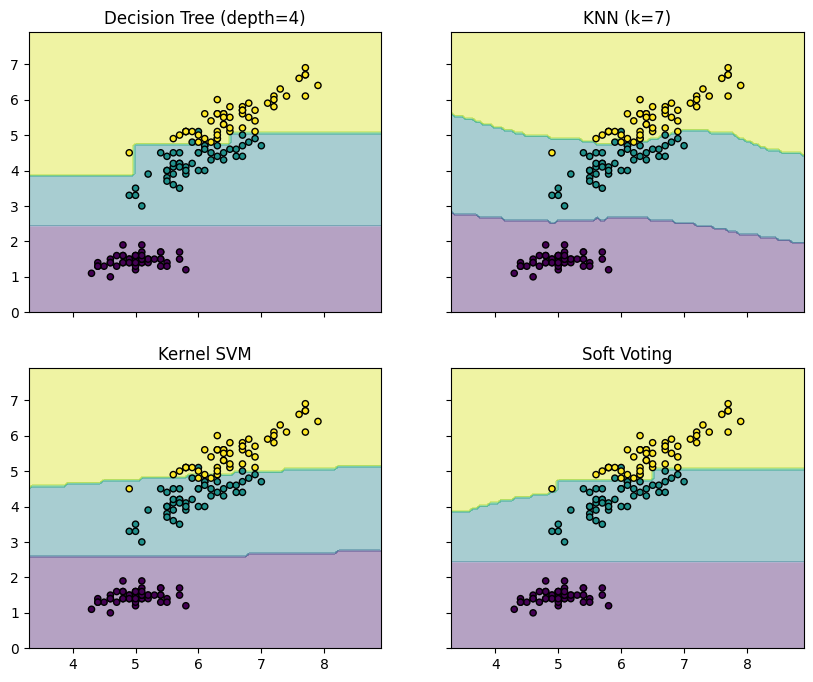

In [5]:
# Plotting decision regions
f, axarr = plt.subplots(2, 2, sharex="col", sharey="row", figsize=(10, 8))
for idx, clf, tt in zip(
    product([0, 1], [0, 1]),
    [clf1, clf2, clf3, clf_vote],
    ["Decision Tree (depth=4)", "KNN (k=7)", "Kernel SVM", "Soft Voting"],
):
    DecisionBoundaryDisplay.from_estimator(
        clf, X, alpha=0.4, ax=axarr[idx[0], idx[1]], response_method="predict"
    )
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor="k")
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

<Figure size 500x400 with 0 Axes>

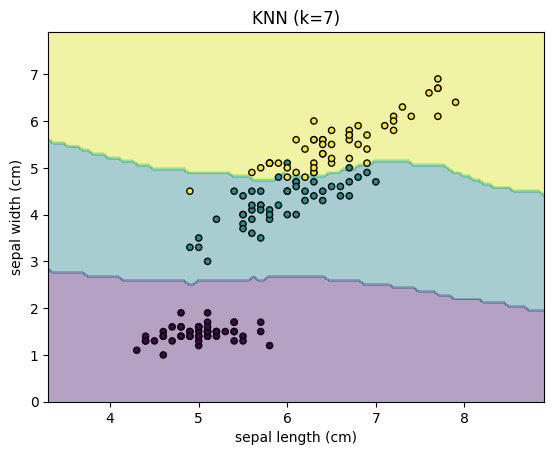

In [7]:
# Simplified plotting where you plot 1 classifier at a time (no subplots)
classifiers = [clf1, clf2, clf3, clf_vote]
classifier_titles = ["Decision Tree (depth=4)", "KNN (k=7)", "Kernel SVM", "Soft Voting"]
c_index = 1 #index 0 is clf1, 1 is clf2, 2 is clf3, 3 is clf_vote
plt.figure(figsize=(5,4))
display = DecisionBoundaryDisplay.from_estimator(
        classifiers[c_index], X, alpha=0.4, response_method="predict")

# Plotting the data points
display.ax_.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor="k")

plt.xlabel(iris["feature_names"][0])
plt.ylabel(iris["feature_names"][1])
plt.title(classifier_titles[c_index])
plt.show()

In [8]:
# decision surface for logistic regression on a binary classification dataset
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression

# generate dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=1, cluster_std=3)
# define the model
model = LogisticRegression()
# fit the model
model.fit(X, y)


LogisticRegression()

In [9]:
#CREATE A GRID FOR REGIONS
# define bounds of the domain
min1, max1 = X[:, 0].min()-1, X[:, 0].max()+1
min2, max2 = X[:, 1].min()-1, X[:, 1].max()+1
# define the x and y scale
x1grid = np.arange(min1, max1, 0.1) #x range
x2grid = np.arange(min2, max2, 0.1) #y range
# create all of the lines and rows of the grid
xx, yy = np.meshgrid(x1grid, x2grid)
# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))
print("Shape of xx: ",xx.shape)
print("Shape of yy: ",yy.shape)
print("Grid shape:", grid.shape) #90,979 (x, y) points from 370x287 pixels of (xx, yy)
print("xx.shape[0] * xx.shape[1]: ", xx.shape[0] * xx.shape[1])

Shape of xx:  (317, 287)
Shape of yy:  (317, 287)
Grid shape: (90979, 2)
xx.shape[0] * xx.shape[1]:  90979


Shape of grid prediction output:  (90979,)


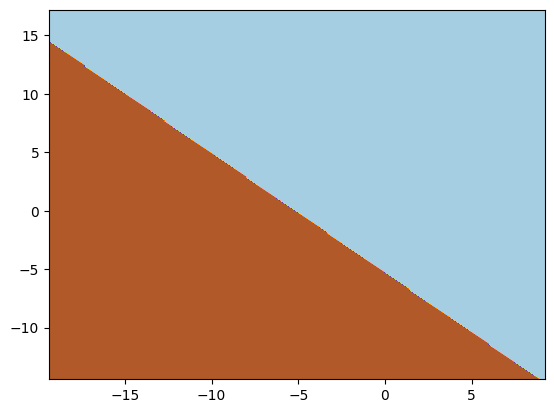

In [10]:
#Plot grid
# make predictions for each point on the grid
yhat = model.predict(grid)
print("Shape of grid prediction output: ", yhat.shape)
# reshape the predictions back into a grid of pixels.
zz = yhat.reshape(xx.shape)
# plot the grid of x, y and z values as a surface
#contourf([X, Y,] Z, [levels], **kwargs) - draws filled contours
plt.contourf(xx, yy, zz, cmap='Paired') #now for each xx, yy, we have the prediction value zz.
#plt.scatter(xx, yy, zz)

<ipython-input-11-985c62bb4e27>:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')


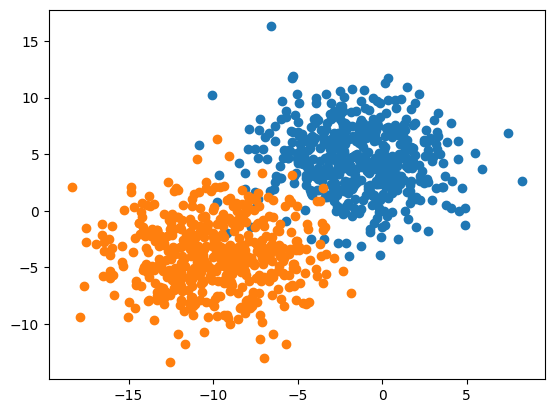

In [11]:
#PLOT 2 CLASSES
# create scatter plot for samples from each class
for class_value in range(2):
    # get row indexes for samples with this class
    row_ix = np.where(y == class_value)
    # create scatter of these samples
    plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')

<ipython-input-12-169e119f11a1>:13: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')


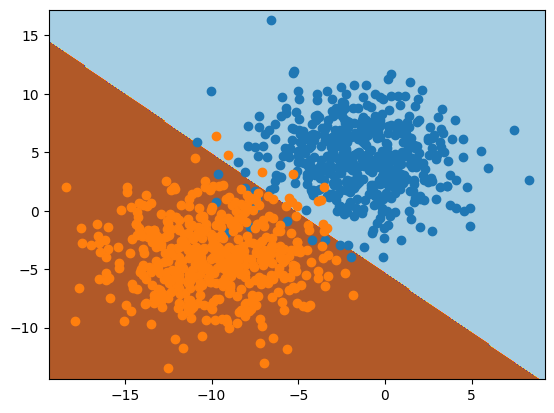

In [12]:
#COMBINE GRID AND CLASS PLOTS
# make predictions for the grid
yhat = model.predict(grid)
# reshape the predictions back into a grid
zz = yhat.reshape(xx.shape)
# plot the grid of x, y and z values as a surface
plt.contourf(xx, yy, zz, cmap='Paired')
# create scatter plot for samples from each class
for class_value in range(2):
    # get row indexes for samples with this class
    row_ix = np.where(y == class_value)
    # create scatter of these samples
    plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')